## 1. Data Loading 

Primeiro carregamos o dataset `dataR2.csv`e verificamos a distribuição das classes (1=Saudável, 2=Cancro) .



========== DATA LOADING ==========


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1



Linhas: 116, Colunas: 10


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000



Missing por coluna:
 Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

Distribuição de classes no dataset:
Classification
1    52
2    64
Name: count, dtype: int64


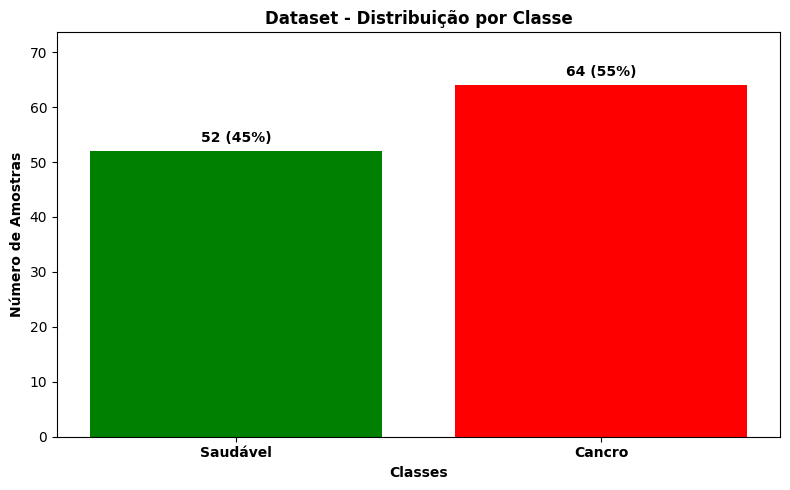

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve, auc
)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy import stats
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import confusion_matrix, precision_score, f1_score, roc_auc_score, roc_curve


print("\n========== DATA LOADING ==========")
data = pd.read_csv('dataR2.csv')
display(data.head())
print(f"\nLinhas: {data.shape[0]}, Colunas: {data.shape[1]}")
display(data.describe())
print("\nMissing por coluna:\n", data.isnull().sum())

class_counts = data['Classification'].value_counts().sort_index()
total = class_counts.sum()
print("\nDistribuição de classes no dataset:")
print(class_counts)

x = np.arange(len(class_counts))
labels_map = {1: "Saudável", 2: "Cancro"}
labels = [labels_map[i] for i in class_counts.index]
colors = ['green' if i == 1 else 'red' for i in class_counts.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(x, class_counts.values, color=colors)
for xi, bar, count in zip(x, bars, class_counts.values):
    y = bar.get_height()
    plt.text(xi, y + max(total*0.01, 1), f"{count} ({count/total:.0%})",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Dataset - Distribuição por Classe", fontweight='bold')
plt.xlabel("Classes", fontweight='bold'); plt.ylabel("Número de Amostras", fontweight='bold')
plt.xticks(x, labels, fontweight='bold')
plt.ylim(0, max(class_counts.values)*1.15)
plt.tight_layout(); plt.show()


labels_map = {1: "Saudável", 2: "Cancro"}
data_v = data.copy()
data_v["ClassLabel"] = data_v["Classification"].map(labels_map)

num_cols = data.select_dtypes(include=[np.number]).columns.drop('Classification', errors='ignore')
features = list(num_cols)

feat0 = features[0]
fig = go.Figure()

fig.add_trace(go.Violin(
    y=data_v.loc[data_v["Classification"]==1, feat0],
    name="Saudável",
    box_visible=True, meanline_visible=True, points='all', jitter=0.05, scalemode='width'
))
fig.add_trace(go.Violin(
    y=data_v.loc[data_v["Classification"]==2, feat0],
    name="Cancro",
    box_visible=True, meanline_visible=True, points='all', jitter=0.05, scalemode='width'
))

fig.update_layout(
    title=f"{feat0} — Distribuição por Classe (Violin)",
    autosize=False, width=1100, height=520,
    font=dict(size=16, color="black"),
    yaxis_title=feat0,
    showlegend=True
)

updatemenus = [
    dict(
        buttons=[
            dict(
                label=feat,
                method="update",
                args=[
                    {
                        "y": [
                            data_v.loc[data_v["Classification"]==1, feat],
                            data_v.loc[data_v["Classification"]==2, feat]
                        ]
                    },
                    {
                        "title": f"{feat} — Distribuição por Classe (Violin)",
                        "yaxis": {"title": feat}
                    }
                ],
            ) for feat in features
        ],
        direction="down",
        showactive=True,
        x=0.02, y=1.15
    )
]
fig.update_layout(updatemenus=updatemenus)
fig.show()


## 2. DATA PARTITIONING
Nesta secção dividimos os dados para 70% para treino e 30% para teste


========== DATA PARTITIONING ==========
Train shape: (81, 9)  Test shape: (35, 9)

Distribuição por classe – TOTAL:
                 count   perc
Classification              
1                  52  44.8%
2                  64  55.2%

Distribuição por classe – TREINO:
                 count   perc
Classification              
1                  36  44.4%
2                  45  55.6%

Distribuição por classe – TESTE:
                 count   perc
Classification              
1                  16  45.7%
2                  19  54.3%


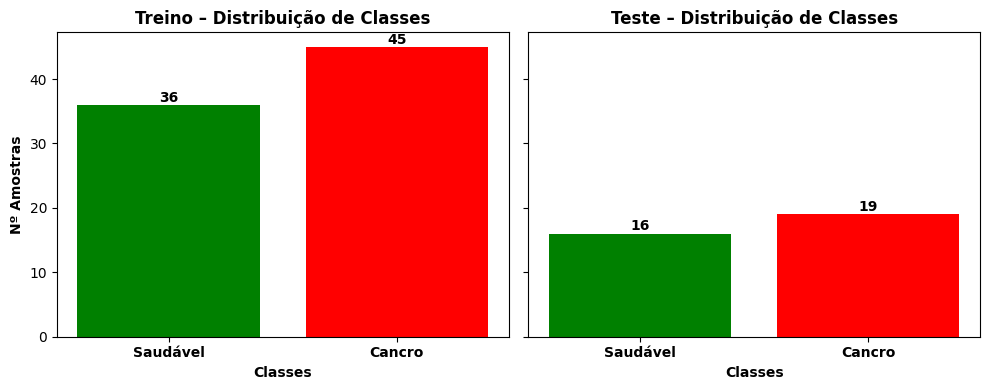

In [49]:
print("\n========== DATA PARTITIONING ==========")

y = data['Classification']
X = data.drop(columns=['Classification'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42, shuffle=True
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

def _dist_df(yv):
    vc = yv.value_counts().sort_index()
    return pd.DataFrame({'count': vc, 'perc': (vc/vc.sum()).map(lambda v: f"{v:.1%}")})

print("\nDistribuição por classe – TOTAL:\n", _dist_df(y))
print("\nDistribuição por classe – TREINO:\n", _dist_df(y_train))
print("\nDistribuição por classe – TESTE:\n", _dist_df(y_test))

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_std  = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
train_counts = y_train.value_counts().sort_index()
axes[0].bar(train_counts.index, train_counts.values, color=['green','red'])
axes[0].set_title('Treino – Distribuição de Classes', fontweight='bold')
axes[0].set_xlabel('Classes', fontweight='bold'); axes[0].set_ylabel('Nº Amostras', fontweight='bold')
axes[0].set_xticks([1,2]); axes[0].set_xticklabels(['Saudável','Cancro'], fontweight='bold')
for i, v in enumerate(train_counts.values): axes[0].text(i+1, v + 0.5, str(v), ha='center', fontweight='bold')

test_counts = y_test.value_counts().sort_index()
axes[1].bar(test_counts.index, test_counts.values, color=['green','red'])
axes[1].set_title('Teste – Distribuição de Classes', fontweight='bold')
axes[1].set_xlabel('Classes', fontweight='bold')
axes[1].set_xticks([1,2]); axes[1].set_xticklabels(['Saudável','Cancro'], fontweight='bold')
for i, v in enumerate(test_counts.values): axes[1].text(i+1, v + 0.5, str(v), ha='center', fontweight='bold')
plt.tight_layout(); plt.show()


## 3. KRUSSKAL-WALLIS e MATRIZ DE CORRELAÇÃO
Aqu com os dados de treino faço o Kruskal–Wallis para cada categoria e escolho as 5 categorias q tem mais H para fazer a mariz de correlação.


========== KRUSKAL–WALLIS (Treino) ==========

Ranked features (by H):
Glucose: H=19.640129  p=9.35e-06
Resistin: H=7.649593  p=0.00568
HOMA: H=5.645890  p=0.0175
Insulin: H=3.058390  p=0.0803
Age: H=1.015856  p=0.314
BMI: H=0.474830  p=0.491
MCP.1: H=0.216902  p=0.641
Adiponectin: H=0.070822  p=0.79
Leptin: H=0.000000  p=1


,feature,H,p_value
0,Glucose,19.640129,0.000009
1,Resistin,7.649593,0.005679
2,HOMA,5.645890,0.017496
3,Insulin,3.058390,0.080321
4,Age,1.015856,0.313504
5,BMI,0.474830,0.490773
6,MCP.1,0.216902,0.641410
7,Adiponectin,0.070822,0.790144
8,Leptin,0.000000,1.000000


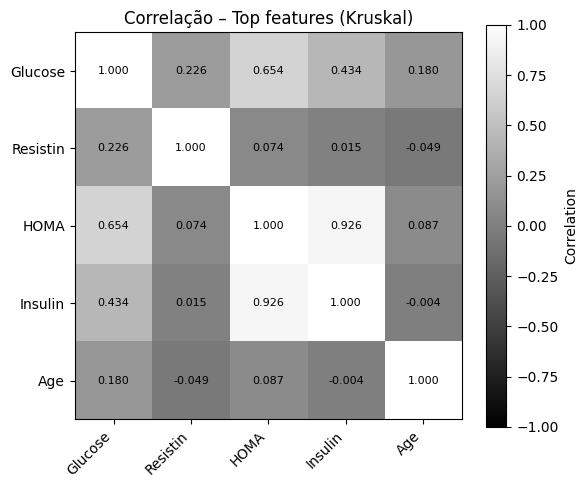

In [50]:

print("\n========== KRUSKAL–WALLIS (Treino) ==========")

X_kw = X_train.astype(float)
y_kw = y_train.copy()
classes_sorted = sorted(y_kw.unique())
group_idx = {c: np.where(y_kw.values == c)[0] for c in classes_sorted}

Hs, Ps = {}, {}
fnames = X_kw.columns.tolist(); X_np = X_kw.to_numpy()
for i, fname in enumerate(fnames):
    groups = [X_np[group_idx[c], i].flatten() for c in classes_sorted]
    st = stats.kruskal(*groups)
    Hs[fname] = st.statistic; Ps[fname] = st.pvalue

ranked = sorted(Hs.items(), key=lambda x: x[1], reverse=True)
print("\nRanked features (by H):")
for f, h in ranked: print(f"{f}: H={h:.6f}  p={Ps[f]:.3g}")

k_top = min(10, len(ranked))
res_df = pd.DataFrame([(f, Hs[f], Ps[f]) for f, _ in ranked[:k_top]], columns=["feature", "H", "p_value"])
display(res_df)

k_corr = min(5, len(ranked))
top_feats = [f for f, _ in ranked[:k_corr]]
corrM = X_kw[top_feats].corr().to_numpy()

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(corrM, vmin=-1, vmax=1, cmap='gray', aspect='equal')
ax.set_xticks(range(k_corr)); ax.set_yticks(range(k_corr))
ax.set_xticklabels(top_feats, rotation=45, ha='right'); ax.set_yticklabels(top_feats)
ax.set_title("Correlação – Top features (Kruskal)")
cbar = plt.colorbar(im, ax=ax); cbar.set_label("Correlation")
for i in range(k_corr):
    for j in range(k_corr):
        ax.text(j, i, f"{corrM[i,j]:.3f}", ha='center', va='center', fontsize=8)
plt.tight_layout(); plt.show()


## 4. ROC
Nos dados de treino, calculei a ROC e a AUC de cada variável, ordenei-as por AUC, comparei o Top-5 com o do Kruskal e desenhei as ROC das 5 melhores.


========== ROC–AUC por feature (Treino) ==========

=== Ranking por AUC (treino) ===
Glucose       AUC=0.7877
Resistin      AUC=0.6796
HOMA          AUC=0.6543
Insulin       AUC=0.6136
MCP.1         AUC=0.5302
Leptin        AUC=0.5000
Adiponectin   AUC=0.4827
BMI           AUC=0.4552
Age           AUC=0.4346

=== Comparação: top-5 AUC vs top-5 Kruskal (H) ===
Top-5 AUC     : ['Glucose', 'Resistin', 'HOMA', 'Insulin', 'MCP.1']
Top-5 Kruskal : ['Glucose', 'Resistin', 'HOMA', 'Insulin', 'Age']


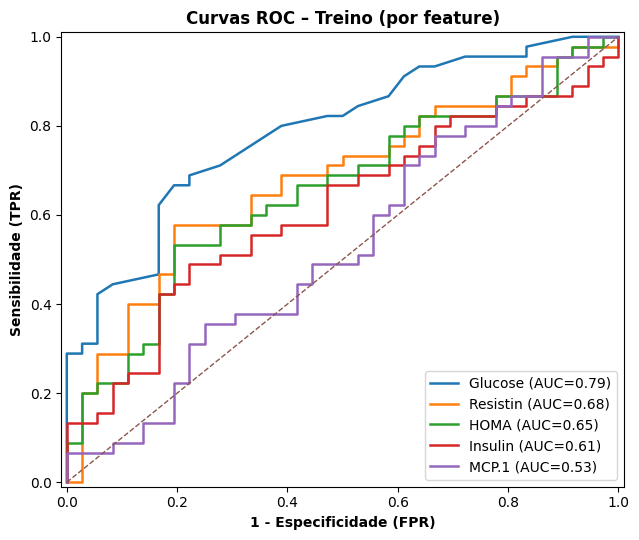

In [51]:

print("\n========== ROC–AUC por feature (Treino) ==========")

y_train_bin = (y_train == 2).astype(int).values
roc_points, roc_auc_dict = {}, {}

for f in X_train.columns:
    scores = X_train[f].values  
    fpr, tpr, thr = roc_curve(y_train_bin, scores, pos_label=1)
    roc_points[f] = (fpr, tpr)
    roc_auc_dict[f] = auc(fpr, tpr)

rank_auc = sorted(roc_auc_dict.items(), key=lambda x: x[1], reverse=True)

print("\n=== Ranking por AUC (treino) ===")
for feat, a in rank_auc:
    print(f"{feat:12s}  AUC={a:.4f}")

print("\n=== Comparação: top-5 AUC vs top-5 Kruskal (H) ===")
top5_auc = [f for f,_ in rank_auc[:5]]
top5_kw  = [f for f,_ in ranked[:5]]
print("Top-5 AUC     :", top5_auc)
print("Top-5 Kruskal :", [f for f,_ in sorted([(f,0) for f,_ in ranked], key=lambda x: 0, reverse=False)[:5]])  

top_k = min(5, len(rank_auc))
top_features_auc_train = [feat for feat, _ in rank_auc[:top_k]]

plt.figure(figsize=(6.5,5.5))
for feat in top_features_auc_train:
    fpr, tpr = roc_points[feat]
    plt.plot(fpr, tpr, linewidth=1.8, label=f"{feat} (AUC={roc_auc_dict[feat]:.2f})")
plt.plot([0,1], [0,1], '--', linewidth=1)
plt.xlim([-0.01, 1.01]); plt.ylim([-0.01, 1.01])
plt.xlabel("1 - Especificidade (FPR)", fontweight='bold')
plt.ylabel("Sensibilidade (TPR)", fontweight='bold')
plt.title("Curvas ROC – Treino (por feature)", fontweight='bold')
plt.legend(loc='lower right'); plt.tight_layout(); plt.show()


## 5.PCA
Aqui fiz o PCA só no treino, imprimi os autovalores e os autovetores, mostrei o scree plot com a regra de Kaiser (λ=1) e projetei os dados do treino na PC1.

In [52]:

print("\n========== PCA (Análise — estilo prof) ==========")



features_for_pca = X_train_std.columns.tolist()
Z_train = X_train_std[features_for_pca].values 

pca = PCA()
pca.fit(Z_train)

print("PCA eigenvalues/Explained variance")
eigvals = pca.explained_variance_
print(eigvals)
print("Sum of eigenvalues=" + str(np.sum(eigvals)))

print("PCA eigenvectors/Principal components")
W = pca.components_.T    
print(W)


lam = pca.explained_variance_          
x   = np.arange(1, len(lam) + 1)        

fig = px.scatter(
    x=x, y=lam,
    labels={'x': 'PC', 'y': 'Explained Variance (λ)'},
    title='Scree plot (autovalores)'
)
fig.add_hline(
    y=1.0, line_width=2, line_dash='dash', line_color='red',
    annotation_text='Kaiser λ=1', annotation_position='top left'
)
fig.update_traces(mode='markers', marker_size=9)
fig.update_xaxes(dtick=1)
fig.show()

pca1 = PCA(n_components=1)
X1D = pca1.fit_transform(Z_train)  
print(np.shape(X1D))

labels_map = {1: "Saudável", 2: "Cancro"}
y_train_labels = y_train.map(labels_map)

fig = px.scatter(
    x=X1D[:, 0],
    y=np.zeros(X1D.shape[0]),
    color=y_train_labels,
    labels=dict(x="PC1", y="", color="Classe")
)
fig.update_traces(marker_size=8)
fig.show()




========== PCA (Análise — estilo prof) ==========
PCA eigenvalues/Explained variance
[2.95769533 1.54052744 1.31317495 1.16978379 0.76322714 0.58833957
 0.4601659  0.28713676 0.03244912]
Sum of eigenvalues=9.112499999999995
PCA eigenvectors/Principal components
[[ 1.19723412e-01 -1.96730661e-01  1.49601889e-01  7.82317218e-01
   2.80277259e-01  2.59451290e-01 -3.22057471e-01 -2.49302854e-01
  -2.86208889e-02]
 [ 2.94534213e-01 -3.89337854e-01  3.93700669e-01 -2.96342279e-01
  -2.75022087e-01  2.77944858e-01  2.23259291e-01 -5.59593858e-01
   5.44626446e-02]
 [ 4.30208489e-01  1.37051347e-01 -9.41283461e-02  1.06715490e-01
   4.93860123e-01 -8.53083303e-02  6.89954041e-01 -2.28330002e-02
  -2.19444721e-01]
 [ 4.52906489e-01  3.98829166e-01  6.57285172e-04 -1.84275898e-02
  -3.21081455e-01 -1.27651216e-01 -3.44979859e-01 -1.32087052e-01
  -6.16136976e-01]
 [ 5.01125868e-01  3.80578921e-01 -7.57033463e-02  5.80280920e-02
  -9.33397284e-02 -7.81853232e-02 -1.12823889e-01 -4.98424630e-02
 

(81, 1)


## 6. LDA
Aplico o LDA

In [53]:
Xtr = X_train_std.to_numpy()
ytr = y_train.to_numpy()

lda = LDA(solver="svd")   
lda.fit(Xtr, ytr)

Ztr = lda.transform(Xtr)[:, 0]   

labels_map = {1: "Saudável", 2: "Cancro"}
cores = pd.Series(ytr).map(labels_map)

fig = px.scatter(
    x=Ztr,
    y=np.zeros_like(Ztr),
    color=cores,
    labels=dict(x="LD1", y="", color="Classe"),
    title="LDA — Projeção 1D (Treino)"
)
fig.update_traces(marker_size=8)
fig.update_yaxes(visible=False, showticklabels=False, showgrid=False)  # fica só a “linha”
fig.show()

#### CLASSIFICATION
## 7.MDC Euclidiano
Agora ja com dados de teste calculei o mdc euclidiano e mdc mahalanobis e as metricas de desempenho

In [54]:


print("\n========== MDC 2D — Euclidiano & Mahalanobis==========")

# ---- 1) Escolha das duas variáveis (já padronizadas)
f1, f2 = "Glucose", "Resistin"   
Ztr = X_train_std[[f1, f2]].copy()
Zte = X_test_std[[f1, f2]].copy()

# classes
c1, c2 = sorted(y_train.unique())
ix_tr_1 = (y_train == c1).values
ix_tr_2 = (y_train == c2).values
ix_te_1 = (y_test  == c1).values
ix_te_2 = (y_test  == c2).values

# ---- 2) Estatísticas 2D no TREINO
X1 = Ztr.values[ix_tr_1]
X2 = Ztr.values[ix_tr_2]
mu1 = X1.mean(axis=0)
mu2 = X2.mean(axis=0)

# Σ pooled p/ Mahalanobis
n1, n2 = X1.shape[0], X2.shape[0]
S1 = np.cov(X1, rowvar=False, bias=False)
S2 = np.cov(X2, rowvar=False, bias=False)
S  = ((n1-1)*S1 + (n2-1)*S2) / (n1 + n2 - 2)
Sinv = np.linalg.pinv(S)

# ---- 3) Decisores lineares g2(x) - g1(x) = w^T x + b (score)
# Euclidiano
w_e = (mu2 - mu1)
b_e = -0.5*(mu2 @ mu2 - mu1 @ mu1)

# Mahalanobis
mu1_S = Sinv @ mu1
mu2_S = Sinv @ mu2
w_m = (mu2_S - mu1_S)
b_m = -0.5*(mu2 @ mu2_S - mu1 @ mu1_S)

# ---- 4) Scores & predições no TESTE 
score_e_test = Zte.values @ w_e + b_e
score_m_test = Zte.values @ w_m + b_m
y_pred_e = np.where(score_e_test > 0, c2, c1)
y_pred_m = np.where(score_m_test > 0, c2, c1)

# ---- 5) Métricas no TESTE
def metrics_block(y_true, y_pred, score):
    cm = confusion_matrix(y_true, y_pred, labels=[c1, c2])
    tn, fp, fn, tp = cm.ravel()
    sens = tp/(tp+fn) if (tp+fn) else float('nan')
    spec = tn/(tn+fp) if (tn+fp) else float('nan')
    prec = precision_score(y_true, y_pred, pos_label=c2, zero_division=0)
    f1   = f1_score(y_true, y_pred, pos_label=c2, zero_division=0)
    auc  = roc_auc_score((y_true==c2).astype(int), score)
    return cm, sens, spec, prec, f1, auc

cm_e, sens_e, spec_e, prec_e, f1_e, auc_e = metrics_block(y_test.values, y_pred_e, score_e_test)
cm_m, sens_m, spec_m, prec_m, f1_m, auc_m = metrics_block(y_test.values, y_pred_m, score_m_test)

print("\n=== Euclidiano (TESTE) ===")
print(cm_e)
print(f"Sensitivity: {sens_e:.3f} | Specificity: {spec_e:.3f} | Precision: {prec_e:.3f} | F1: {f1_e:.3f} | ROC-AUC: {auc_e:.3f}")

print("\n=== Mahalanobis (TESTE) ===")
print(cm_m)
print(f"Sensitivity: {sens_m:.3f} | Specificity: {spec_m:.3f} | Precision: {prec_m:.3f} | F1: {f1_m:.3f} | ROC-AUC: {auc_m:.3f}")

def plot_mdc_2d(Ztr, Zte, ytr, yte, mu1, mu2, w, b, title, color_fn="#000", color_fp="#000"):
    y_pred = np.where((Zte.values @ w + b) > 0, c2, c1)
    FP_idx = np.where((yte==c1) & (y_pred==c2))[0]
    FN_idx = np.where((yte==c2) & (y_pred==c1))[0]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=Zte.values[ix_te_1,0], y=Zte.values[ix_te_1,1],
        mode='markers', name='Saudável', marker=dict(color='blue', size=9)
    ))
    fig.add_trace(go.Scatter(
        x=Zte.values[ix_te_2,0], y=Zte.values[ix_te_2,1],
        mode='markers', name='Cancro', marker=dict(color='red', size=9)
    ))

    if len(FP_idx):
        fig.add_trace(go.Scatter(
            x=Zte.values[FP_idx,0], y=Zte.values[FP_idx,1],
            mode='markers', name='False Positive',
            marker=dict(symbol='circle-open', color='red', size=15, line=dict(width=3, color='red'))
        ))
    if len(FN_idx):
        fig.add_trace(go.Scatter(
            x=Zte.values[FN_idx,0], y=Zte.values[FN_idx,1],
            mode='markers', name='False Negative',
            marker=dict(symbol='circle-open', color='blue', size=15, line=dict(width=3, color='blue'))
        ))

    fig.add_trace(go.Scatter(
        x=[mu1[0]], y=[mu1[1]], mode='markers', name='Mean (Saudável)',
        marker=dict(symbol='x', size=20, color='green', line=dict(width=1, color='black'))
    ))
    fig.add_trace(go.Scatter(
        x=[mu2[0]], y=[mu2[1]], mode='markers', name='Mean (Cancro)',
        marker=dict(symbol='x', size=20, color='yellow', line=dict(width=1, color='black'))
    ))

    fig.add_trace(go.Scatter(
        x=[mu1[0], mu2[0]], y=[mu1[1], mu2[1]],
        mode='lines', name='Inter mean segment',
        line=dict(color='black', width=4)
    ))

    x1min = min(Ztr[f1].min(), Zte[f1].min()) - 1.0
    x1max = max(Ztr[f1].max(), Zte[f1].max()) + 1.0
    x1_line = np.linspace(x1min, x1max, 200)
    if abs(w[1]) > 1e-8:
        x2_line = (-b - w[0]*x1_line) / w[1]
        fig.add_trace(go.Scatter(
            x=x1_line, y=x2_line, mode='lines', name='Hyperplane',
            line=dict(dash='dash', color='gray', width=4)
        ))

    fig.update_layout(
        title=title,
        xaxis_title=f1, yaxis_title=f2,
        autosize=False, width=900, height=720,
        legend=dict(itemsizing='constant')
    )
    return fig

fig_e = plot_mdc_2d(Ztr, Zte, y_train.values, y_test.values, mu1, mu2, w_e, b_e,
                    f"MDC Euclidiano — {f1} × {f2}")
fig_m = plot_mdc_2d(Ztr, Zte, y_train.values, y_test.values, mu1, mu2, w_m, b_m,
                    f"MDC Mahalanobis — {f1} × {f2}")

fig_e.show()
fig_m.show()





========== MDC 2D — Euclidiano & Mahalanobis==========

=== Euclidiano (TESTE) ===
[[14  2]
 [12  7]]
Sensitivity: 0.368 | Specificity: 0.875 | Precision: 0.778 | F1: 0.500 | ROC-AUC: 0.747

=== Mahalanobis (TESTE) ===
[[14  2]
 [11  8]]
Sensitivity: 0.421 | Specificity: 0.875 | Precision: 0.800 | F1: 0.552 | ROC-AUC: 0.724


FISHER LDA

In [ ]:

print("\n========== FISHER Linear Discriminant  ==========")

f1, f2 = "Glucose", "Resistin"
Ztr = X_train_std[[f1, f2]].copy()
Zte = X_test_std[[f1, f2]].copy()

c1, c2 = sorted(y_train.unique())
ix_tr_1 = (y_train == c1).values
ix_tr_2 = (y_train == c2).values
ix_te_1 = (y_test  == c1).values
ix_te_2 = (y_test  == c2).values

X1 = Ztr.values[ix_tr_1]
X2 = Ztr.values[ix_tr_2]
mu1 = X1.mean(axis=0)  
mu2 = X2.mean(axis=0)  

# 2) Matriz de dispersão intra-classe (pooled) S_w
S1 = np.cov(X1, rowvar=False, bias=False)
S2 = np.cov(X2, rowvar=False, bias=False)
n1, n2 = X1.shape[0], X2.shape[0]
Sw = ((n1-1)*S1 + (n2-1)*S2) / (n1 + n2 - 2)
Sw_inv = np.linalg.pinv(Sw)

# 3) Direção de Fisher e limiar 
w = Sw_inv @ (mu2 - mu1)
b = -0.5 * (mu1 + mu2) @ w

# 4) Hiperplano
def add_hyperplane(fig, Ztr, Zte, w, b, name="Hyperplane"):
    x1min = min(Ztr[f1].min(), Zte[f1].min()) - 1.0
    x1max = max(Ztr[f1].max(), Zte[f1].max()) + 1.0
    x1_line = np.linspace(x1min, x1max, 200)
    if abs(w[1]) > 1e-8:
        x2_line = (-b - w[0]*x1_line) / w[1]
        fig.add_trace(go.Scatter(
            x=x1_line, y=x2_line, mode='lines', name=name,
            line=dict(dash='dash', color='gray', width=4)
        ))

# 5) Plot — TREINO
fig_tr = go.Figure()
fig_tr.add_trace(go.Scatter(x=Ztr.values[ix_tr_1,0], y=Ztr.values[ix_tr_1,1],
                            mode='markers', name='Saudável (train)', marker=dict(color='blue', size=9)))
fig_tr.add_trace(go.Scatter(x=Ztr.values[ix_tr_2,0], y=Ztr.values[ix_tr_2,1],
                            mode='markers', name='Cancro (train)', marker=dict(color='red', size=9)))
# Médias + segmento
fig_tr.add_trace(go.Scatter(x=[mu1[0]], y=[mu1[1]], mode='markers', name='Mean (Saudável)',
                            marker=dict(symbol='x', size=20, color='green', line=dict(width=1, color='black'))))
fig_tr.add_trace(go.Scatter(x=[mu2[0]], y=[mu2[1]], mode='markers', name='Mean (Cancro)',
                            marker=dict(symbol='x', size=20, color='yellow', line=dict(width=1, color='black'))))
fig_tr.add_trace(go.Scatter(x=[mu1[0], mu2[0]], y=[mu1[1], mu2[1]],
                            mode='lines', name='Inter mean segment', line=dict(color='black', width=4)))
add_hyperplane(fig_tr, Ztr, Zte, w, b)
fig_tr.update_layout(title=f"Fisher LDA — TREINO ({f1} × {f2})", xaxis_title=f1, yaxis_title=f2,
                     autosize=False, width=900, height=720)
fig_tr.show()

# 6) Plot — TESTE
# Predição no TESTE via score s = w^T x + b
s_te = Zte.values @ w + b
y_pred_te = np.where(s_te > 0, c2, c1)
# FP / FN
FP_idx = np.where((y_test.values==c1) & (y_pred_te==c2))[0]
FN_idx = np.where((y_test.values==c2) & (y_pred_te==c1))[0]

fig_te = go.Figure()
fig_te.add_trace(go.Scatter(x=Zte.values[ix_te_1,0], y=Zte.values[ix_te_1,1],
                            mode='markers', name='Saudável (test)', marker=dict(color='blue', size=9)))
fig_te.add_trace(go.Scatter(x=Zte.values[ix_te_2,0], y=Zte.values[ix_te_2,1],
                            mode='markers', name='Cancro (test)', marker=dict(color='red', size=9)))
# Realce FP/FN com círculo aberto 
if len(FP_idx):
    fig_te.add_trace(go.Scatter(x=Zte.values[FP_idx,0], y=Zte.values[FP_idx,1],
                                mode='markers', name='False Positive',
                                marker=dict(symbol='circle-open', color='red', size=15, line=dict(width=3, color='red'))))
if len(FN_idx):
    fig_te.add_trace(go.Scatter(x=Zte.values[FN_idx,0], y=Zte.values[FN_idx,1],
                                mode='markers', name='False Negative',
                                marker=dict(symbol='circle-open', color='blue', size=15, line=dict(width=3, color='blue'))))
# Médias (das classes — iguais às do treino)
fig_te.add_trace(go.Scatter(x=[mu1[0]], y=[mu1[1]], mode='markers', name='Mean (Saudável)',
                            marker=dict(symbol='x', size=20, color='green', line=dict(width=1, color='black'))))
fig_te.add_trace(go.Scatter(x=[mu2[0]], y=[mu2[1]], mode='markers', name='Mean (Cancro)',
                            marker=dict(symbol='x', size=20, color='yellow', line=dict(width=1, color='black'))))
fig_te.add_trace(go.Scatter(x=[mu1[0], mu2[0]], y=[mu1[1], mu2[1]],
                            mode='lines', name='Inter mean segment', line=dict(color='black', width=4)))
add_hyperplane(fig_te, Ztr, Zte, w, b)
fig_te.update_layout(title=f"Fisher LDA — TESTE ({f1} × {f2})", xaxis_title=f1, yaxis_title=f2,
                     autosize=False, width=900, height=720)
fig_te.show()

# 7) Métricas (TESTE) — Sens, Spec, Precision, F1, ROC-AUC
cm = confusion_matrix(y_test.values, y_pred_te, labels=[c1, c2])
tn, fp, fn, tp = cm.ravel()
sens = tp/(tp+fn) if (tp+fn) else float('nan')   
spec = tn/(tn+fp) if (tn+fp) else float('nan')   
prec = precision_score(y_test.values, y_pred_te, pos_label=c2, zero_division=0)
f1   = f1_score(y_test.values, y_pred_te, pos_label=c2, zero_division=0)
auc  = roc_auc_score((y_test.values==c2).astype(int), s_te)

print("\n[TEST] Confusion matrix:\n", cm)
print(f"[TEST] Sensitivity: {sens:.3f} | Specificity: {spec:.3f} | Precision: {prec:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f}")

# Métricas no TREINO
s_tr = Ztr.values @ w + b
y_pred_tr = np.where(s_tr > 0, c2, c1)
cm_tr = confusion_matrix(y_train.values, y_pred_tr, labels=[c1, c2])
tn_tr, fp_tr, fn_tr, tp_tr = cm_tr.ravel()
sens_tr = tp_tr/(tp_tr+fn_tr) if (tp_tr+fn_tr) else float('nan')
spec_tr = tn_tr/(tn_tr+fp_tr) if (tn_tr+fp_tr) else float('nan')
prec_tr = precision_score(y_train.values, y_pred_tr, pos_label=c2, zero_division=0)
f1_tr   = f1_score(y_train.values, y_pred_tr, pos_label=c2, zero_division=0)
auc_tr  = roc_auc_score((y_train.values==c2).astype(int), s_tr)

print("\n[TRAIN] Confusion matrix:\n", cm_tr)
print(f"[TRAIN] Sensitivity: {sens_tr:.3f} | Specificity: {spec_tr:.3f} | Precision: {prec_tr:.3f} | F1: {f1_tr:.3f} | ROC-AUC: {auc_tr:.3f}")





========== FISHER Linear Discriminant  ==========



[TEST] Confusion matrix:
 [[14  2]
 [11  8]]
[TEST] Sensitivity: 0.421 | Specificity: 0.875 | Precision: 0.800 | F1: 0.552 | ROC-AUC: 0.724

[TRAIN] Confusion matrix:
 [[31  5]
 [19 26]]
[TRAIN] Sensitivity: 0.578 | Specificity: 0.861 | Precision: 0.839 | F1: 0.684 | ROC-AUC: 0.821
